In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')
sns.set()

titanic['fareclass'] = titanic['class']
titanic = titanic.drop(columns = ['class'])
print(titanic) #drop 'class' because it clashes with keyword 'class'

#calculate survival rate of people of different gender and class
print(titanic.pivot_table('survived',index='sex',columns = 'fareclass')) 

#gets the survived of first class females
titanic.query("(fareclass == 'First') and (sex == 'female')")['survived']

     survived  pclass     sex   age  sibsp  parch     fare embarked    who  \
0           0       3    male  22.0      1      0   7.2500        S    man   
1           1       1  female  38.0      1      0  71.2833        C  woman   
2           1       3  female  26.0      0      0   7.9250        S  woman   
3           1       1  female  35.0      1      0  53.1000        S  woman   
4           0       3    male  35.0      0      0   8.0500        S    man   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
886         0       2    male  27.0      0      0  13.0000        S    man   
887         1       1  female  19.0      0      0  30.0000        S  woman   
888         0       3  female   NaN      1      2  23.4500        S  woman   
889         1       1    male  26.0      0      0  30.0000        C    man   
890         0       3    male  32.0      0      0   7.7500        Q    man   

     adult_male deck  embark_town alive  alone fareclass  
0   

1      1
3      1
11     1
31     1
52     1
      ..
856    1
862    1
871    1
879    1
887    1
Name: survived, Length: 94, dtype: int64

In [2]:
age_array = titanic['age'].dropna().unique()
# for i in age_array:
#     print(i)
# print("_________")

# for i in sorted(age_array):
#     print(i)
# print("_________")

age = pd.cut(titanic['age'],[0,18,80])
#no. of survived
print(titanic.pivot_table('survived',['sex',age],'fareclass',aggfunc = 'count'))
#rate of survival 
print(titanic.pivot_table('survived',['sex',age],'fareclass')) 

fareclass        First  Second  Third
sex    age                           
female (0, 18]      11      14     43
       (18, 80]     74      60     59
male   (0, 18]       5      15     51
       (18, 80]     96      84    202
fareclass           First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663


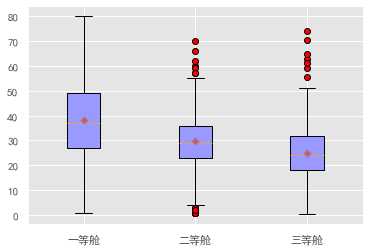

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

titanic.dropna(subset=['age'],inplace=True)
plt.style.use('ggplot')

titanic.sort_values(by='pclass',inplace=True)
Age = []
Levels = titanic.pclass.unique()
for pclass in Levels:
    Age.append(titanic.loc[titanic.pclass==pclass,'age'])

plt.boxplot(x=Age,patch_artist=True,labels=['一等舱','二等舱','三等舱'],showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},medianprops={'linestyle':'--','color':'orange'})
plt.show()

In [7]:
import plotly.graph_objects as go

x_data = ['First Class','Second Class','Third Class']

y_data = Age

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
#             boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1,
            boxmean=True,
            marker=dict(
                outliercolor='rgba(255,0,0,0.6)',
                line=dict(
                    outlierwidth=4)))
        )

fig.update_layout(
    title='Age of passengers in each Class onboard the Titanic',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

fig.write_image('../images/fig.png')

In [6]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=titanic['age'],
    histnorm='percent',
    name='Age', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=80,
        size=1
    ),
    marker_color='#EB89B5',
    opacity=0.75
))

fig.update_layout(
    title_text='Age of Passengers onboard the Titanic', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0 # gap between bars of the same location coordinates
)

fig.show()

fig.write_image('../images/fig2.png')